# Summary

Using an opener strategy showed runs per season decrease compared to the regular strategy for SSG Laders(10.3), Lotte Giants(16.5), while showed runs per sesason increase for Doosan Bears(68.1).

# Introduction

Unlike the regular strategy where the starting pitcher throws a long inning and the bullpen covers the leftover, opener strategy starts with relief pitcher sholtly and the long relief(or staring pithcher) stretchs an inning.
Some teams in MLB have used opener strategy recently and made some progess, and I wondered if the strategy would work in KBO, so I worked on this project to find it out.

# Objective

The objective is to compare the allowed run between opener strategy and regular strategy.

# Methodology

In order to compare the models, a simulator will be created that will take the lineup and output the number of runs it will score in a season. This simulator will run 100 times and the average will be used in comparisons.

# Imports

In [60]:
import requests
import numpy as np
import pandas as pd
import urllib
import random
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen
from html_table_parser import parser_functions as parser

In [2]:
np.random.seed(222)

# Crawling function

The data was collected from STATIZ. All of the stats are from the 2022 season. I chose five starting pitchers who pitched most innings and a relief pitcher who didn't showed a trustworthy appearance in each team.

After collecting the data, I used a pitcher's stat over batting order positions as a base stat and a stat over times facing opponents in game as a weight for the base stat.

In [3]:
def crawling1(url):
    result = urlopen(url)
    html = result.read()
    soup = BeautifulSoup(html, 'html.parser')
    temp = soup.find_all('table')
    table = pd.read_html(url, header=0, encoding='utf-8')
    table = table[1]
    table = pd.DataFrame(table)
    table = table[6:]
    
    table = table.reset_index()
    toDrop = ['index', '상황', '타율', '출루', '장타', 'OPS', 'avLI', 'RE24', 'WPA', '루 타',
             '타 점', '득 점', '도 루', '도 실', '병 살', '희 타', '희 비', '삼 진']
    table.drop(toDrop,inplace=True, axis=1)
    table.columns = ['PA','AB','H','2B','3B','HR','BB','HBP','IBB']
    table = table.astype(float)
    
    return table

In [4]:
def crawling2(url):
    result = urlopen(url)
    html = result.read()
    soup = BeautifulSoup(html, 'html.parser')
    temp = soup.find_all('table')
    table = pd.read_html(url, header=0, encoding='utf-8')
    table = table[1]
    table = pd.DataFrame(table)
    table = table[26:29]
    
    table = table.reset_index()
    toDrop = ['index', '상황', '타율', '출루', '장타', 'avLI', 'RE24', 'WPA']
    table.drop(toDrop,inplace=True, axis=1)
    table = table.astype(float)
    
    table['value'] = 0
    table.loc[0, 'value'] = table['OPS'][0]/np.mean(table['OPS'])
    table.loc[1, 'value'] = table['OPS'][1]/np.mean(table['OPS'])
    table.loc[2, 'value'] = table['OPS'][2]/np.mean(table['OPS'])
    
    return table['value']

In [5]:
def crawling3(url):
    result = urlopen(url)
    html = result.read()
    soup = BeautifulSoup(html, 'html.parser')
    temp = soup.find_all('table')
    table = pd.read_html(url, header=0, encoding='utf-8')
    table = table[1]
    table = pd.DataFrame(table)
    table = table[25:28]
    
    table = table.reset_index()
    toDrop = ['index', '상황', '타율', '출루', '장타', 'avLI', 'RE24', 'WPA']
    table.drop(toDrop,inplace=True, axis=1)
    table = table.astype(float)
    
    table['value'] = 0
    table.loc[0, 'value'] = table['OPS'][0]/np.mean(table['OPS'])
    table.loc[1, 'value'] = table['OPS'][1]/np.mean(table['OPS'])
    table.loc[2, 'value'] = table['OPS'][2]/np.mean(table['OPS'])
    
    return table['value']

In [6]:
def bats(a, b):
    a1 = a.copy()
    a2 = a.copy()
    a3 = a.copy()
    
    toDrop = ['PA', 'AB']
    a1.drop(toDrop,inplace=True, axis=1)
    a2.drop(toDrop,inplace=True, axis=1)
    a3.drop(toDrop,inplace=True, axis=1)

    a1 = a1*b[0]
    a2 = a2*b[1]
    a3 = a3*b[2]
    
    bat1 = a.copy()
    bat2 = a.copy()
    bat3 = a.copy()

    toDrop = ['H', '2B', '3B', 'HR', 'BB', 'HBP', 'IBB']
    bat1.drop(toDrop,inplace=True, axis=1)
    bat2.drop(toDrop,inplace=True, axis=1)
    bat3.drop(toDrop,inplace=True, axis=1)
    
    bat1 = bat1.join(a1, how='left')
    bat2 = bat2.join(a2, how='left')
    bat3 = bat3.join(a3, how='left')
    
    bat = pd.concat([bat1, bat2, bat3])
    bat = bat.reset_index()
    
    return bat

# Data and Set Roster

Lotte Giants

# 반즈 + 문경찬

In [7]:
반즈1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%B0%98%EC%A6%88&birth=1995-10-01&re=1&da=4&year=2022"
반즈2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%B0%98%EC%A6%88&birth=1995-10-01&re=1&da=6&year=2022"

반즈1 = crawling1(반즈1)
반즈2 = crawling2(반즈2)

반즈 = bats(반즈1, 반즈2)

문경찬 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%AC%B8%EA%B2%BD%EC%B0%AC&birth=1992-07-08&re=1&da=4&year=2022"
문경찬 = crawling1(문경찬)

lot1 = pd.concat([반즈, 문경찬])
toDrop = ['index']
lot1.drop(toDrop,inplace=True, axis=1)
lot1 = lot1.reset_index()

for i in range(27, 36):
    lot1.loc[i, 'index'] = i

lot1

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,100.0,87.0,19.714739,2.957211,0.985737,0.000000,6.900158,3.942948,0.000000
1,1,96.0,87.0,25.629160,7.885895,0.985737,0.000000,4.928685,0.985737,0.000000
2,2,93.0,81.0,16.757528,2.957211,0.000000,0.000000,7.885895,1.971474,0.985737
3,3,92.0,82.0,22.671949,2.957211,1.971474,2.957211,6.900158,1.971474,0.000000
4,4,91.0,84.0,14.786054,1.971474,0.000000,0.000000,4.928685,0.985737,0.000000
5,5,86.0,78.0,17.743265,0.000000,0.000000,1.971474,5.914422,0.985737,0.000000
6,6,81.0,73.0,21.686212,1.971474,0.985737,1.971474,1.971474,2.957211,0.000000
7,7,77.0,68.0,17.743265,2.957211,0.000000,0.985737,4.928685,2.957211,0.000000
8,8,72.0,68.0,15.771791,2.957211,0.000000,0.000000,1.971474,0.985737,0.000000
9,9,100.0,87.0,21.521395,3.228209,1.076070,0.000000,7.532488,4.304279,0.000000


In [17]:
roster = SetRoster(lot1)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [18]:
lot1_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

lot1_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(lot1_run1)
print(lot1_run2)

748.023
729.088


# 박세웅 + 문경찬

In [62]:
박세웅1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%B0%95%EC%84%B8%EC%9B%85&birth=1995-11-30&re=1&da=4&year=2022"
박세웅2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%B0%95%EC%84%B8%EC%9B%85&birth=1995-11-30&re=1&da=6&year=2022"

박세웅1 = crawling1(박세웅1)
박세웅2 = crawling2(박세웅2)

박세웅 = bats(박세웅1, 박세웅2)

문경찬 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%AC%B8%EA%B2%BD%EC%B0%AC&birth=1992-07-08&re=1&da=4&year=2022"
문경찬 = crawling1(문경찬)

lot2 = pd.concat([박세웅, 문경찬])
toDrop = ['index']
lot2.drop(toDrop,inplace=True, axis=1)
lot2 = lot2.reset_index()

for i in range(27, 36):
    lot2.loc[i, 'index'] = i

lot2

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,87.0,80.0,17.809879,4.452470,0.000000,0.890494,6.233458,0.000000,0.890494
1,1,82.0,79.0,21.371855,4.452470,1.780988,0.000000,0.890494,0.890494,0.000000
2,2,82.0,78.0,19.590867,2.671482,0.000000,1.780988,3.561976,0.000000,0.000000
3,3,82.0,74.0,19.590867,3.561976,0.000000,1.780988,5.342964,1.780988,0.000000
4,4,78.0,72.0,19.590867,3.561976,0.000000,0.890494,3.561976,0.890494,0.000000
5,5,70.0,67.0,19.590867,1.780988,0.000000,1.780988,0.890494,0.000000,0.000000
6,6,69.0,62.0,16.028891,2.671482,0.000000,0.000000,3.561976,0.890494,0.000000
7,7,67.0,58.0,14.247903,3.561976,0.000000,0.000000,3.561976,2.671482,0.000000
8,8,62.0,60.0,12.466915,1.780988,1.780988,0.000000,0.890494,0.000000,0.000000
9,9,87.0,80.0,21.752097,5.438024,0.000000,1.087605,7.613234,0.000000,1.087605


In [63]:
roster = SetRoster(lot2)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [64]:
lot2_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

lot2_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(lot2_run1)
print(lot2_run2)

887.506
854.873


# 이인복 + 문경찬

In [20]:
이인복1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%9D%B8%EB%B3%B5&birth=1991-06-18&re=1&da=4&year=2022"
이인복2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%9D%B8%EB%B3%B5&birth=1991-06-18&re=1&da=6&year=2022"

이인복1 = crawling1(이인복1)
이인복2 = crawling2(이인복2)

이인복 = bats(이인복1, 이인복2)

문경찬 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%AC%B8%EA%B2%BD%EC%B0%AC&birth=1992-07-08&re=1&da=4&year=2022"
문경찬 = crawling1(문경찬)

lot3 = pd.concat([이인복, 문경찬])
toDrop = ['index']
lot3.drop(toDrop,inplace=True, axis=1)
lot3 = lot3.reset_index()

for i in range(27, 36):
    lot3.loc[i, 'index'] = i

lot3

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,68.0,59.0,17.549397,1.949933,0.000000,0.974966,7.799732,0.000000,0.0
1,1,69.0,65.0,19.499329,0.974966,0.000000,0.974966,3.899866,0.000000,0.0
2,2,68.0,65.0,18.524363,4.874832,0.000000,0.000000,0.974966,0.974966,0.0
3,3,66.0,63.0,23.399195,2.924899,0.000000,1.949933,1.949933,0.000000,0.0
4,4,61.0,59.0,18.524363,1.949933,0.000000,0.974966,0.974966,0.000000,0.0
5,5,58.0,53.0,13.649531,2.924899,0.974966,0.000000,4.874832,0.000000,0.0
6,6,58.0,55.0,12.674564,1.949933,0.000000,0.000000,1.949933,0.000000,0.0
7,7,51.0,46.0,12.674564,2.924899,0.000000,0.000000,1.949933,1.949933,0.0
8,8,48.0,40.0,12.674564,0.974966,0.000000,0.974966,4.874832,0.974966,0.0
9,9,68.0,59.0,16.149307,1.794367,0.000000,0.897184,7.177470,0.000000,0.0


In [21]:
roster = SetRoster(lot3)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [22]:
lot3_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

lot3_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(lot3_run1)
print(lot3_run2)

872.011
837.276


# 나균안 + 문경찬

In [23]:
나균안1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%82%98%EA%B7%A0%EC%95%88&birth=1998-03-16&re=1&da=4&year=2022"
나균안2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%82%98%EA%B7%A0%EC%95%88&birth=1998-03-16&re=1&da=6&year=2022"

나균안1 = crawling1(나균안1)
나균안2 = crawling2(나균안2)

나균안 = bats(나균안1, 나균안2)

문경찬 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%AC%B8%EA%B2%BD%EC%B0%AC&birth=1992-07-08&re=1&da=4&year=2022"
문경찬 = crawling1(문경찬)

lot4 = pd.concat([나균안, 문경찬])
toDrop = ['index']
lot4.drop(toDrop,inplace=True, axis=1)
lot4 = lot4.reset_index()

for i in range(27, 36):
    lot4.loc[i, 'index'] = i

lot4

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,65.0,60.0,19.656077,5.172652,0.000000,2.069061,5.172652,0.000000,0.000000
1,1,60.0,52.0,8.276243,2.069061,0.000000,0.000000,6.207182,0.000000,1.034530
2,2,56.0,52.0,15.517956,3.103591,0.000000,0.000000,3.103591,0.000000,0.000000
3,3,53.0,47.0,11.379834,6.207182,0.000000,0.000000,5.172652,1.034530,0.000000
4,4,54.0,48.0,13.448895,5.172652,1.034530,0.000000,5.172652,0.000000,0.000000
5,5,53.0,45.0,12.414365,2.069061,0.000000,1.034530,5.172652,2.069061,0.000000
6,6,56.0,52.0,15.517956,6.207182,0.000000,1.034530,3.103591,0.000000,0.000000
7,7,56.0,53.0,19.656077,5.172652,0.000000,1.034530,2.069061,0.000000,0.000000
8,8,53.0,49.0,13.448895,2.069061,2.069061,0.000000,3.103591,0.000000,0.000000
9,9,65.0,60.0,17.845304,4.696133,0.000000,1.878453,4.696133,0.000000,0.000000


In [24]:
roster = SetRoster(lot4)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [25]:
lot4_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

lot4_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(lot4_run1)
print(lot4_run2)

857.532
841.78


# 스파크맨 + 문경찬

In [26]:
스파크맨1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%8A%A4%ED%8C%8C%ED%81%AC%EB%A7%A8&birth=1992-05-11&re=1&da=4&year=2022"
스파크맨2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%8A%A4%ED%8C%8C%ED%81%AC%EB%A7%A8&birth=1992-05-11&re=1&da=6&year=2022"

스파크맨1 = crawling1(스파크맨1)
스파크맨2 = crawling2(스파크맨2)

스파크맨 = bats(스파크맨1, 스파크맨2)

문경찬 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%AC%B8%EA%B2%BD%EC%B0%AC&birth=1992-07-08&re=1&da=4&year=2022"
문경찬 = crawling1(문경찬)

lot5 = pd.concat([스파크맨, 문경찬])
toDrop = ['index']
lot5.drop(toDrop,inplace=True, axis=1)
lot5 = lot4.reset_index()

for i in range(27, 36):
    lot5.loc[i, 'index'] = i

lot5

,level_0,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,0,65.0,60.0,19.656077,5.172652,0.000000,2.069061,5.172652,0.000000,0.000000
1,1,1,60.0,52.0,8.276243,2.069061,0.000000,0.000000,6.207182,0.000000,1.034530
2,2,2,56.0,52.0,15.517956,3.103591,0.000000,0.000000,3.103591,0.000000,0.000000
3,3,3,53.0,47.0,11.379834,6.207182,0.000000,0.000000,5.172652,1.034530,0.000000
4,4,4,54.0,48.0,13.448895,5.172652,1.034530,0.000000,5.172652,0.000000,0.000000
5,5,5,53.0,45.0,12.414365,2.069061,0.000000,1.034530,5.172652,2.069061,0.000000
6,6,6,56.0,52.0,15.517956,6.207182,0.000000,1.034530,3.103591,0.000000,0.000000
7,7,7,56.0,53.0,19.656077,5.172652,0.000000,1.034530,2.069061,0.000000,0.000000
8,8,8,53.0,49.0,13.448895,2.069061,2.069061,0.000000,3.103591,0.000000,0.000000
9,9,9,65.0,60.0,17.845304,4.696133,0.000000,1.878453,4.696133,0.000000,0.000000


In [27]:
roster = SetRoster(lot5)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [28]:
lot5_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

lot5_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(lot5_run1)
print(lot5_run2)

857.428
844.564


Doosan Bears

# 최원준 + 이승진

In [29]:
최원준1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%B5%9C%EC%9B%90%EC%A4%80&birth=1994-12-21&re=1&da=4&year=2022"
최원준2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%B5%9C%EC%9B%90%EC%A4%80&birth=1994-12-21&re=1&da=6&year=2022"

최원준1 = crawling1(최원준1)
최원준2 = crawling2(최원준2)

최원준 = bats(최원준1, 최원준2)

이승진 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%8A%B9%EC%A7%84&birth=1995-01-07&re=1&da=4&year=2022"
이승진 = crawling1(이승진)

doo1 = pd.concat([최원준, 이승진])
toDrop = ['index']
doo1.drop(toDrop,inplace=True, axis=1)
doo1 = doo1.reset_index()

for i in range(27, 36):
    doo1.loc[i, 'index'] = i

doo1

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,91.0,82.0,19.198955,1.828472,0.914236,2.742708,6.399652,1.828472,0.0
1,1,89.0,85.0,24.684371,3.656944,0.000000,0.914236,3.656944,0.000000,0.0
2,2,88.0,80.0,22.855899,4.571180,0.000000,4.571180,5.485416,0.914236,0.0
3,3,86.0,77.0,21.027427,3.656944,0.000000,2.742708,5.485416,1.828472,0.0
4,4,81.0,73.0,14.627775,0.914236,0.000000,2.742708,5.485416,0.000000,0.0
5,5,76.0,74.0,18.284719,3.656944,0.000000,1.828472,0.914236,0.914236,0.0
6,6,71.0,65.0,21.941663,4.571180,0.000000,2.742708,1.828472,0.000000,0.0
7,7,68.0,63.0,16.456247,3.656944,0.914236,0.000000,0.914236,0.914236,0.0
8,8,63.0,58.0,8.228124,1.828472,0.000000,0.914236,3.656944,0.000000,0.0
9,9,91.0,82.0,18.897257,1.799739,0.899869,2.699608,6.299086,1.799739,0.0


In [30]:
roster = SetRoster(doo1)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [31]:
doo1_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

doo1_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(doo1_run1)
print(doo1_run2)

851.533
899.109


# 스탁 + 이승진

In [32]:
스탁1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%8A%A4%ED%83%81&birth=1989-11-21&re=1&da=4&year=2022"
스탁2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%8A%A4%ED%83%81&birth=1989-11-21&re=1&da=6&year=2022"

스탁1 = crawling1(스탁1)
스탁2 = crawling2(스탁2)

스탁 = bats(스탁1, 스탁2)

이승진 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%8A%B9%EC%A7%84&birth=1995-01-07&re=1&da=4&year=2022"
이승진 = crawling1(이승진)

doo2 = pd.concat([스탁, 이승진])
toDrop = ['index']
doo2.drop(toDrop,inplace=True, axis=1)
doo2 = doo2.reset_index()

for i in range(27, 36):
    doo2.loc[i, 'index'] = i

doo2

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,90.0,73.0,21.257971,1.118841,1.118841,0.000000,16.782609,2.237681,0.0
1,1,88.0,81.0,27.971014,4.475362,0.000000,2.237681,6.713043,0.000000,0.0
2,2,85.0,75.0,25.733333,5.594203,1.118841,1.118841,8.950725,2.237681,0.0
3,3,84.0,72.0,17.901449,2.237681,0.000000,1.118841,12.307246,0.000000,0.0
4,4,82.0,70.0,23.495652,3.356522,0.000000,3.356522,11.188406,2.237681,0.0
5,5,78.0,69.0,20.139130,4.475362,0.000000,0.000000,8.950725,1.118841,0.0
6,6,75.0,60.0,13.426087,2.237681,0.000000,1.118841,15.663768,0.000000,0.0
7,7,71.0,60.0,14.544928,1.118841,0.000000,1.118841,7.831884,3.356522,0.0
8,8,69.0,64.0,15.663768,2.237681,0.000000,0.000000,4.475362,0.000000,0.0
9,9,90.0,73.0,16.879710,0.888406,0.888406,0.000000,13.326087,1.776812,0.0


In [33]:
roster = SetRoster(doo2)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [34]:
doo2_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

doo2_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(doo2_run1)
print(doo2_run2)

690.228
744.376


# 곽빈 + 이승진

In [35]:
곽빈1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EA%B3%BD%EB%B9%88&birth=1999-05-28&re=1&da=4&year=2022"
곽빈2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EA%B3%BD%EB%B9%88&birth=1999-05-28&re=1&da=6&year=2022"

곽빈1 = crawling1(곽빈1)
곽빈2 = crawling2(곽빈2)

곽빈 = bats(곽빈1, 곽빈2)

이승진 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%8A%B9%EC%A7%84&birth=1995-01-07&re=1&da=4&year=2022"
이승진 = crawling1(이승진)

doo3 = pd.concat([곽빈, 이승진])
toDrop = ['index']
doo3.drop(toDrop,inplace=True, axis=1)
doo3 = doo3.reset_index()

for i in range(27, 36):
    doo3.loc[i, 'index'] = i

doo3

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,83.0,68.0,17.222638,7.091674,0.0,0.000000,12.157156,1.013096,1.013096
1,1,79.0,67.0,22.288120,5.065482,0.0,3.039289,8.104771,0.000000,0.000000
2,2,77.0,68.0,15.196445,3.039289,0.0,1.013096,6.078578,3.039289,0.000000
3,3,76.0,70.0,14.183349,4.052385,0.0,1.013096,4.052385,2.026193,0.000000
4,4,73.0,64.0,18.235734,3.039289,0.0,1.013096,8.104771,1.013096,0.000000
5,5,69.0,61.0,19.248831,4.052385,0.0,4.052385,7.091674,1.013096,0.000000
6,6,65.0,57.0,14.183349,2.026193,0.0,2.026193,7.091674,1.013096,0.000000
7,7,63.0,57.0,12.157156,2.026193,0.0,0.000000,4.052385,1.013096,0.000000
8,8,60.0,53.0,12.157156,0.000000,0.0,1.013096,4.052385,1.013096,0.000000
9,9,83.0,68.0,15.695978,6.463050,0.0,0.000000,11.079514,0.923293,0.923293


In [36]:
roster = SetRoster(doo3)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [37]:
doo3_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

doo3_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(doo3_run1)
print(doo3_run2)

744.441
809.447


# 이영하 + 이승진

In [38]:
이영하1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%98%81%ED%95%98&birth=1997-11-01&re=1&da=4&year=2022"
이영하2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%98%81%ED%95%98&birth=1997-11-01&re=1&da=6&year=2022"

이영하1 = crawling1(이영하1)
이영하2 = crawling2(이영하2)

이영하 = bats(이영하1, 이영하2)

이승진 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%8A%B9%EC%A7%84&birth=1995-01-07&re=1&da=4&year=2022"
이승진 = crawling1(이승진)

doo4 = pd.concat([이영하, 이승진])
toDrop = ['index']
doo4.drop(toDrop,inplace=True, axis=1)
doo4 = doo4.reset_index()

for i in range(27, 36):
    doo4.loc[i, 'index'] = i

doo4

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,57.0,44.0,10.980000,2.994545,0.000000,0.000000,10.980000,0.000000,0.000000
1,1,56.0,48.0,11.978182,0.000000,0.000000,0.000000,3.992727,0.998182,0.000000
2,2,55.0,41.0,16.969091,2.994545,0.000000,0.998182,12.976364,0.998182,0.000000
3,3,54.0,47.0,12.976364,0.998182,0.000000,0.998182,6.987273,0.000000,0.998182
4,4,53.0,45.0,13.974545,0.998182,0.000000,0.998182,4.990909,0.998182,0.000000
5,5,52.0,45.0,11.978182,1.996364,0.000000,0.000000,5.989091,0.000000,0.000000
6,6,49.0,41.0,13.974545,0.998182,0.000000,1.996364,2.994545,1.996364,0.000000
7,7,46.0,39.0,7.985455,0.000000,0.000000,0.000000,4.990909,0.000000,0.000000
8,8,40.0,35.0,7.985455,2.994545,0.998182,0.000000,2.994545,0.998182,0.000000
9,9,57.0,44.0,11.580000,3.158182,0.000000,0.000000,11.580000,0.000000,0.000000


In [39]:
roster = SetRoster(doo4)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [40]:
doo4_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

doo4_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(doo4_run1)
print(doo4_run2)

716.807
779.393


# 최승용 + 이승진

In [41]:
최승용1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%B5%9C%EC%8A%B9%EC%9A%A9&birth=2001-05-11&re=1&da=4&year=2022"
최승용2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%B5%9C%EC%8A%B9%EC%9A%A9&birth=2001-05-11&re=1&da=6&year=2022"

최승용1 = crawling1(최승용1)
최승용2 = crawling2(최승용2)

최승용 = bats(최승용1, 최승용2)

이승진 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%EC%8A%B9%EC%A7%84&birth=1995-01-07&re=1&da=4&year=2022"
이승진 = crawling1(이승진)

doo5 = pd.concat([최승용, 이승진])
toDrop = ['index']
doo5.drop(toDrop,inplace=True, axis=1)
doo5 = doo5.reset_index()

for i in range(27, 36):
    doo5.loc[i, 'index'] = i

doo5

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,58.0,52.0,10.426950,0.000000,0.000000,0.000000,4.468693,0.000000,0.0
1,1,53.0,47.0,8.192603,2.234346,0.744782,0.000000,2.979129,0.000000,0.0
2,2,52.0,44.0,12.661296,0.744782,0.000000,0.744782,5.213475,0.744782,0.0
3,3,48.0,42.0,7.447821,1.489564,0.000000,0.000000,3.723911,0.744782,0.0
4,4,46.0,44.0,7.447821,1.489564,0.000000,0.000000,1.489564,0.000000,0.0
5,5,45.0,36.0,5.213475,0.744782,0.000000,1.489564,6.703039,0.000000,0.0
6,6,39.0,36.0,14.895643,1.489564,2.234346,1.489564,2.234346,0.000000,0.0
7,7,41.0,38.0,5.958257,2.234346,0.000000,1.489564,0.744782,0.000000,0.0
8,8,41.0,35.0,5.213475,0.744782,0.000000,0.744782,4.468693,0.000000,0.0
9,9,58.0,52.0,12.087880,0.000000,0.000000,0.000000,5.180520,0.000000,0.0


In [42]:
roster = SetRoster(doo5)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [43]:
doo5_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

doo5_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(doo5_run1)
print(doo5_run2)

673.322
775.491


SSG Landers

# 폰트 + 조요한

In [44]:
폰트1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%ED%8F%B0%ED%8A%B8&birth=1990-05-24&re=1&da=4&year=2022"
폰트2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%ED%8F%B0%ED%8A%B8&birth=1990-05-24&re=1&da=6&year=2022"

폰트1 = crawling1(폰트1)
폰트2 = crawling2(폰트2)

폰트 = bats(폰트1, 폰트2)

조요한 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%A1%B0%EC%9A%94%ED%95%9C&birth=2000-01-06&re=1&da=4&year=2022"
조요한 = crawling1(조요한)

ssg1 = pd.concat([폰트, 조요한])
toDrop = ['index']
ssg1.drop(toDrop,inplace=True, axis=1)
ssg1 = ssg1.reset_index()

for i in range(27, 36):
    ssg1.loc[i, 'index'] = i

ssg1

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,90.0,84.0,19.895288,3.141361,0.000000,0.000000,6.282723,0.000000,0.000000
1,1,88.0,84.0,19.895288,2.094241,1.047120,1.047120,4.188482,0.000000,0.000000
2,2,87.0,83.0,19.895288,2.094241,0.000000,5.235602,3.141361,1.047120,0.000000
3,3,86.0,77.0,19.895288,2.094241,1.047120,4.188482,6.282723,2.094241,0.000000
4,4,86.0,82.0,18.848168,5.235602,0.000000,2.094241,2.094241,0.000000,0.000000
5,5,78.0,73.0,14.659686,1.047120,1.047120,3.141361,5.235602,0.000000,0.000000
6,6,75.0,70.0,14.659686,2.094241,0.000000,2.094241,3.141361,1.047120,0.000000
7,7,72.0,65.0,11.518325,2.094241,0.000000,0.000000,2.094241,2.094241,1.047120
8,8,67.0,63.0,8.376963,3.141361,0.000000,1.047120,3.141361,0.000000,0.000000
9,9,90.0,84.0,18.403141,2.905759,0.000000,0.000000,5.811518,0.000000,0.000000


In [45]:
roster = SetRoster(ssg1)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [46]:
ssg1_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

ssg1_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(ssg1_run1)
print(ssg1_run2)

606.039
596.431


# 김광현 + 조요한

In [47]:
김광현1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EA%B9%80%EA%B4%91%ED%98%84&birth=1988-07-22&re=1&da=4&year=2022"
김광현2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EA%B9%80%EA%B4%91%ED%98%84&birth=1988-07-22&re=1&da=6&year=2022"

김광현1 = crawling1(김광현1)
김광현2 = crawling2(김광현2)

김광현 = bats(김광현1, 김광현2)

조요한 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%A1%B0%EC%9A%94%ED%95%9C&birth=2000-01-06&re=1&da=4&year=2022"
조요한 = crawling1(조요한)

ssg2 = pd.concat([김광현, 조요한])
toDrop = ['index']
ssg2.drop(toDrop,inplace=True, axis=1)
ssg2 = ssg2.reset_index()

for i in range(27, 36):
    ssg2.loc[i, 'index'] = i

ssg2

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,90.0,82.0,24.644007,2.053667,1.026834,0.000000,7.187835,0.000000,0.000000
1,1,87.0,78.0,17.456172,2.053667,0.000000,0.000000,8.214669,0.000000,0.000000
2,2,84.0,77.0,25.670841,3.080501,0.000000,3.080501,6.161002,1.026834,0.000000
3,3,83.0,74.0,16.429338,2.053667,1.026834,0.000000,7.187835,2.053667,2.053667
4,4,80.0,75.0,13.348837,1.026834,0.000000,2.053667,4.107335,1.026834,0.000000
5,5,72.0,67.0,9.241503,0.000000,0.000000,1.026834,4.107335,0.000000,0.000000
6,6,68.0,60.0,12.322004,4.107335,0.000000,0.000000,6.161002,1.026834,0.000000
7,7,67.0,64.0,15.402504,2.053667,0.000000,1.026834,3.080501,0.000000,0.000000
8,8,63.0,59.0,10.268336,0.000000,0.000000,3.080501,0.000000,0.000000,0.000000
9,9,90.0,82.0,28.164580,2.347048,1.173524,0.000000,8.214669,0.000000,0.000000


In [48]:
roster = SetRoster(ssg2)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [49]:
ssg2_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

ssg2_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(ssg2_run1)
print(ssg2_run2)

595.999
581.741


# 오원석 + 조요한

In [50]:
오원석1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%98%A4%EC%9B%90%EC%84%9D&birth=2001-04-23&re=1&da=4&year=2022"
오원석2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%98%A4%EC%9B%90%EC%84%9D&birth=2001-04-23&re=1&da=6&year=2022"

오원석1 = crawling1(오원석1)
오원석2 = crawling2(오원석2)

오원석 = bats(오원석1, 오원석2)

조요한 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%A1%B0%EC%9A%94%ED%95%9C&birth=2000-01-06&re=1&da=4&year=2022"
조요한 = crawling1(조요한)

ssg3 = pd.concat([오원석, 조요한])
toDrop = ['index']
ssg3.drop(toDrop,inplace=True, axis=1)
ssg3 = ssg3.reset_index()

for i in range(27, 36):
    ssg3.loc[i, 'index'] = i

ssg3

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,80.0,65.0,22.395259,1.947414,0.000000,0.000000,11.684483,1.947414,0.000000
1,1,79.0,70.0,19.474138,0.973707,0.000000,0.973707,8.763362,0.000000,0.000000
2,2,79.0,73.0,18.500431,3.894828,0.000000,0.973707,5.842241,0.000000,0.000000
3,3,75.0,72.0,21.421552,1.947414,0.973707,5.842241,1.947414,0.000000,0.000000
4,4,74.0,66.0,13.631897,0.000000,0.973707,0.973707,7.789655,0.000000,0.000000
5,5,70.0,64.0,19.474138,6.815948,0.000000,2.921121,3.894828,0.000000,0.000000
6,6,64.0,55.0,15.579310,1.947414,0.000000,0.000000,7.789655,0.000000,0.973707
7,7,58.0,55.0,11.684483,0.000000,0.000000,2.921121,1.947414,0.000000,0.000000
8,8,54.0,46.0,11.684483,2.921121,0.000000,0.973707,6.815948,0.973707,0.000000
9,9,80.0,65.0,20.372845,1.771552,0.000000,0.000000,10.629310,1.771552,0.000000


In [51]:
roster = SetRoster(ssg3)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [52]:
ssg3_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

ssg3_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(ssg3_run1)
print(ssg3_run2)

758.506
750.885


# 이태양 + 조요한

In [54]:
이태양1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%ED%83%9C%EC%96%91&birth=1990-07-03&re=1&da=4&year=2022"
이태양2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%9D%B4%ED%83%9C%EC%96%91&birth=1990-07-03&re=1&da=6&year=2022"

이태양1 = crawling1(이태양1)
이태양2 = crawling3(이태양2)

이태양 = bats(이태양1, 이태양2)

조요한 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%A1%B0%EC%9A%94%ED%95%9C&birth=2000-01-06&re=1&da=4&year=2022"
조요한 = crawling1(조요한)

ssg4 = pd.concat([이태양, 조요한])
toDrop = ['index']
ssg4.drop(toDrop,inplace=True, axis=1)
ssg4 = ssg4.reset_index()

for i in range(27, 36):
    ssg4.loc[i, 'index'] = i

ssg4

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,62.0,57.0,17.178587,2.863098,0.0,0.954366,3.817464,0.000000,0.000000
1,1,60.0,54.0,17.178587,1.908732,0.0,0.954366,1.908732,0.954366,0.000000
2,2,57.0,46.0,12.406757,1.908732,0.0,3.817464,7.634928,1.908732,1.908732
3,3,54.0,52.0,12.406757,2.863098,0.0,3.817464,0.954366,0.954366,0.000000
4,4,48.0,48.0,18.132953,3.817464,0.0,2.863098,0.000000,0.000000,0.000000
5,5,47.0,43.0,6.680562,0.954366,0.0,0.000000,1.908732,0.954366,0.000000
6,6,47.0,45.0,5.726196,0.000000,0.0,0.000000,1.908732,0.000000,0.000000
7,7,49.0,47.0,8.589294,0.954366,0.0,0.000000,1.908732,0.000000,0.000000
8,8,48.0,43.0,12.406757,1.908732,0.0,1.908732,2.863098,0.000000,0.000000
9,9,62.0,57.0,15.022378,2.503730,0.0,0.834577,3.338306,0.000000,0.000000


In [55]:
roster = SetRoster(ssg4)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [56]:
ssg4_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

ssg4_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(ssg4_run1)
print(ssg4_run2)

755.39
723.973


# 모리만도 + 조요한

In [57]:
모리만도1 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%AA%A8%EB%A6%AC%EB%A7%8C%EB%8F%84&birth=1992-11-20&re=1&da=4&year=2022"
모리만도2 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EB%AA%A8%EB%A6%AC%EB%A7%8C%EB%8F%84&birth=1992-11-20&re=1&da=6&year=2022"

모리만도1 = crawling1(모리만도1)
모리만도2 = crawling2(모리만도2)

모리만도 = bats(모리만도1, 모리만도2)

조요한 = "http://www.statiz.co.kr/player.php?opt=4&sopt=0&name=%EC%A1%B0%EC%9A%94%ED%95%9C&birth=2000-01-06&re=1&da=4&year=2022"
조요한 = crawling1(조요한)

ssg5 = pd.concat([모리만도, 조요한])
toDrop = ['index']
ssg5.drop(toDrop,inplace=True, axis=1)
ssg5 = ssg5.reset_index()

for i in range(27, 36):
    ssg5.loc[i, 'index'] = i

ssg5

,index,PA,AB,H,2B,3B,HR,BB,HBP,IBB
0,0,38.0,31.0,2.239089,0.000000,0.0,0.000000,5.597723,1.119545,0.0
1,1,38.0,33.0,2.239089,0.000000,0.0,0.000000,4.478178,1.119545,0.0
2,2,35.0,32.0,10.075901,1.119545,0.0,0.000000,2.239089,0.000000,0.0
3,3,35.0,30.0,7.836812,2.239089,0.0,0.000000,5.597723,0.000000,0.0
4,4,34.0,34.0,11.195446,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5,5,34.0,32.0,8.956357,0.000000,0.0,0.000000,2.239089,0.000000,0.0
6,6,32.0,30.0,6.717268,3.358634,0.0,1.119545,1.119545,1.119545,0.0
7,7,29.0,28.0,11.195446,2.239089,0.0,1.119545,0.000000,0.000000,0.0
8,8,29.0,23.0,3.358634,0.000000,0.0,0.000000,4.478178,1.119545,0.0
9,9,38.0,31.0,2.504744,0.000000,0.0,0.000000,6.261860,1.252372,0.0


In [58]:
roster = SetRoster(ssg5)

starters01 = []
starters02 = []
starters03 = []
starters04 = []
starters05 = []
starters06 = []
starters07 = []
starters08 = []
starters09 = []

starters1 = []
starters2 = []
starters3 = []
starters4 = []
starters5 = []
starters6 = []
starters7 = []
starters8 = []
starters9 = []

starters01 = [roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35]]

starters02 = [roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27]]

starters03 = [roster[29], roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28]]

starters04 = [roster[30], roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29]]

starters05 = [roster[31], roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30]]

starters06 = [roster[32], roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31]]

starters07 = [roster[33], roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32]]

starters08 = [roster[34], roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33]]

starters09 = [roster[35], roster[27], roster[28], roster[29], roster[30], roster[31], roster[32], roster[33], roster[34]]

starters1 = [roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], 
                  roster[1], roster[2], roster[12], roster[13], roster[14], roster[15],
                 roster[16], roster[17], roster[9], roster[10], roster[11], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26]]
                  
starters2 = [roster[4], roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], 
                  roster[2], roster[3], roster[13], roster[14], roster[15], roster[16],
                 roster[17], roster[9], roster[10], roster[11], roster[12], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18]]
                  
starters3 = [roster[5], roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], 
                  roster[3], roster[4], roster[14], roster[15], roster[16], roster[17],
                 roster[9], roster[10], roster[11], roster[12], roster[13], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19]]
                  
starters4 = [roster[6], roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], 
                  roster[4], roster[5], roster[15], roster[16], roster[17], roster[9],
                 roster[10], roster[11], roster[12], roster[13], roster[14], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23], roster[24], roster[25], roster[26], roster[18], 
                 roster[19], roster[20]]
                  
starters5 = [roster[7], roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], 
                  roster[5], roster[6], roster[16], roster[17], roster[9], roster[10],
                 roster[11], roster[12], roster[13], roster[14], roster[15], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24], roster[25], roster[26], roster[18], roster[19], 
                 roster[20], roster[21]]
                  
starters6 = [roster[8], roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], 
                  roster[6], roster[7], roster[17], roster[9], roster[10], roster[11],
                 roster[12], roster[13], roster[14], roster[15], roster[16], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25], roster[26], roster[18], roster[19], roster[20], 
                 roster[21], roster[22]]
                  
starters7 = [roster[0], roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], 
                  roster[7], roster[8], roster[9], roster[10], roster[11], roster[12],
                 roster[13], roster[14], roster[15], roster[16], roster[17], roster[18], 
                 roster[19], roster[20], roster[21], roster[22], roster[23], roster[24], 
                 roster[25], roster[26], roster[18], roster[19], roster[20], roster[21], 
                 roster[22], roster[23]]
                 
starters8 = [roster[1], roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], 
                  roster[8], roster[0], roster[10], roster[11], roster[12], roster[13],
                 roster[14], roster[15], roster[16], roster[17], roster[9], roster[19], 
                 roster[20], roster[21], roster[22], roster[23], roster[24], roster[25], 
                 roster[26], roster[18], roster[19], roster[20], roster[21], roster[22], 
                 roster[23], roster[24]]

starters9 = [roster[2], roster[3], roster[4], roster[5], roster[6], roster[7], roster[8], 
                  roster[0], roster[1], roster[11], roster[12], roster[13], roster[14],
                 roster[15], roster[16], roster[17], roster[9], roster[10], roster[20], 
                 roster[21], roster[22], roster[23], roster[24], roster[25], roster[26], 
                 roster[18], roster[19], roster[20], roster[21], roster[22], roster[23], 
                 roster[24], roster[25]]

In [59]:
ssg5_run1 = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

ssg5_run2 = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,1000)

print(ssg5_run1)
print(ssg5_run2)

558.516
560.957


# Class

The Player Class will be used to store the data for players. Each player will have its own instance that can be used in the simulator.

In [9]:
class Player:
    def __init__(self, index, pa, ab, h, dbl, tpl, hr, bb, hbp, ibb):
        self.index = index
        self.pa = pa
        self.ab = ab
        self.h = h
        self.dbl = dbl
        self.tpl = tpl
        self.hr = hr
        self.bb = bb
        self.hbp = hbp
        self.ibb = ibb
        
        # Create derived stats
        self.obp = (self.h+self.bb+self.hbp+self.ibb)/(self.pa)
        self.slg = (self.h+(2*self.dbl)+(3*self.tpl) + (4*self.hr))/(self.ab)
        self.ops = self.obp+self.slg
    
    # Prints Player information
    
    def __repr__(self):
        return('{}'.format(self.index)) 
    
    def __str__(self):
        return('{}'.format(self.index)) 
        
    # Run outputs the result of the movement of a baserunner
    # Inputs:
    #         start: the base the runner started on
    #        action: the reason the runner was moving, 
    #                the output of running PlateAppearance
    # Output:
    #        1.5: out at second base
    #        2.0: safe at second base
    #        2.5: out at third base
    #        3.0: safe at third base
    #        3.5: out at home
    #        4.0: safe at home, run scored
    def Run(self, start, action):
        returnValue = start
        extra = np.random.random()
        out = np.random.random()
        
        # 1.2 and 1.4 involves dead ball, runner advances
        if action % 1 > 0:
            return(returnValue + 1)
        # Runner scores on a triple or home run, 
        # or a double when starting at 2nd
        if (action > 2 or (action == 2 and start >= 2)):
            return(4.0)
        
        returnValue = action + start
        # See if the runner took an extra base
        if extra <= 0.415:
            returnValue += 1.0
        
        # 4 is the highest value allowed
        if returnValue > 4.0:
            returnValue = 4.0
            
        # Sometimes a runner is thrown out
        if out <= 0.0406:
            returnValue -= 0.5
        
        return(returnValue)
        
        
    
    # PlateAppearance outputs the result of a hitter's plate appearance
    # Inputs:
    #         none
    # Output: 
    #         0.0: out
    #         1.0: single
    #         1.2: walk
    #         1.4: hit by pitch
    #         2.0: double
    #         3.0: triple
    #         4.0: home run
    
    def PlateAppearance(self):
        returnValue = 0.0
        ba = self.h/self.pa
        obp = (self.h + self.hbp + self.bb)/self.pa
        result = np.random.random()
        if result <= ba:
            returnValue = 1.0
            homerun = 1-(self.hr/self.h)
            triple = homerun - (self.tpl/self.h)
            double = triple - (self.dbl/self.h)
            x = np.random.random()
            if x > homerun:
                returnValue += 3
            elif x > triple:
                returnValue += 2
            elif x > double:
                returnValue += 1
        elif result <= obp:
            walk = self.bb/(self.bb+self.hbp)
            x = np.random.random()
            if x < walk:
                returnValue = 1.2 # Walk
            else:
                returnValue = 1.4 # Hit by pitch
        return(returnValue)  

# Simulator

In [10]:
def simulate11(hitters):
    inning = 1
    runs = 0
    currentHitter = 0
    #np.random.seed(222)
    
    while inning <= 5:
        # Start the inning with no outs and the bases clear
        outs = 0
        # Runners on first, second, and third
        runner = ['empty','empty','empty']
        
        while outs < 3:
            pa = hitters[currentHitter].PlateAppearance()
            # League fielding pct is .979 according to STATIZ
            error = 1 if (np.random.random() > .979) else 0
            if pa > 0:
                # Hitter got on base, need to move runners
                # and put the hitter on base
                extraBase = pa+1 if (np.random.random() < .7) else 0
                # Move runner from third, then from second, then from first
                for x in [2,1,0]:
                    if runner[x] != 'empty':
                        result = runner[x].Run(x,pa) + extraBase + error
                        if (result % 1 > 0) & (error == 0): # Runner is out
                            outs += 1
                        elif result >= 4.0: # Runner scored
                            runs += 1
                        else:
                            # Base is occupied, runner cannot advance
                            if runner[int(result)-1] != 'empty':
                                result -= 1
                                runner[int(result)-1] = runner[x]
                            else:
                                runner[int(result)-1] = runner[x]
                        runner[x] = 'empty'
                    if pa >= 4:
                        runs += 1
                    else:
                        runner[int(pa)-1] = hitters[currentHitter]
            else:
                if error > 0:
                    if runner[2] != 'empty':
                        runs +=1
                        runner[2] = 'empty'
                    if runner[1] != 'empty':
                        runner[2] = runner[1]
                        runner[1] = 'empty'
                    if runner[0] != 'empty':
                        runner[1] = runner[0]
                        runner[0] = hitters[currentHitter]
                else:
                    outs += 1
    # Move on to the next hitter
    # going to the top of the lineup after the last
            currentHitter += 1
            if currentHitter > (len(hitters)-1):
                currentHitter = 24


        inning += 1 # Inning over, go to the next inning

    return(runs, currentHitter)

In [11]:
def simulate12(hitters):
    inning = 6
    runs = 0
    currentHitter = 0
    #np.random.seed(222)
    
    while inning <= 6:
        # Start the inning with no outs and the bases clear
        outs = 0
        # Runners on first, second, and third
        runner = ['empty','empty','empty']
        
        while outs < 3:
            pa = hitters[currentHitter].PlateAppearance()
            # League fielding pct is .979 according to STATIZ
            error = 1 if (np.random.random() > .979) else 0
            if pa > 0:
                # Hitter got on base, need to move runners
                # and put the hitter on base
                extraBase = pa+1 if (np.random.random() < .7) else 0
                # Move runner from third, then from second, then from first
                for x in [2,1,0]:
                    if runner[x] != 'empty':
                        result = runner[x].Run(x,pa) + extraBase + error
                        if (result % 1 > 0) & (error == 0): # Runner is out
                            outs += 1
                        elif result >= 4.0: # Runner scored
                            runs += 1
                        else:
                            # Base is occupied, runner cannot advance
                            if runner[int(result)-1] != 'empty':
                                result -= 1
                                runner[int(result)-1] = runner[x]
                            else:
                                runner[int(result)-1] = runner[x]
                        runner[x] = 'empty'
                    if pa >= 4:
                        runs += 1
                    else:
                        runner[int(pa)-1] = hitters[currentHitter]
            else:
                if error > 0:
                    if runner[2] != 'empty':
                        runs +=1
                        runner[2] = 'empty'
                    if runner[1] != 'empty':
                        runner[2] = runner[1]
                        runner[1] = 'empty'
                    if runner[0] != 'empty':
                        runner[1] = runner[0]
                        runner[0] = hitters[currentHitter]
                else:
                    outs += 1
    # Move on to the next hitter
    # going to the top of the lineup after the last
            currentHitter += 1
            if currentHitter > (len(hitters)-1):
                currentHitter = 0

        inning += 1 # Inning over, go to the next inning

    return(runs, currentHitter)

In [12]:
def simulate21(hitters):
    inning = 1
    runs = 0
    currentHitter = 0
    #np.random.seed(222)
    
    while inning <= 1:
        # Start the inning with no outs and the bases clear
        outs = 0
        # Runners on first, second, and third
        runner = ['empty','empty','empty']
        
        while outs < 3:
            pa = hitters[currentHitter].PlateAppearance()
            # League fielding pct is .979 according to STATIZ
            error = 1 if (np.random.random() > .979) else 0
            if pa > 0:
                # Hitter got on base, need to move runners
                # and put the hitter on base
                extraBase = pa+1 if (np.random.random() < .7) else 0
                # Move runner from third, then from second, then from first.
                for x in [2,1,0]:
                    if runner[x] != 'empty':
                        result = runner[x].Run(x,pa) + extraBase + error
                        if (result % 1 > 0) & (error == 0): # Runner is out
                            outs += 1
                        elif result >= 4.0: # Runner scored
                            runs += 1
                        else:
                            # Base is occupied, runner cannot advance
                            if runner[int(result)-1] != 'empty':
                                result -= 1
                                runner[int(result)-1] = runner[x]
                            else:
                                runner[int(result)-1] = runner[x]
                        runner[x] = 'empty'
                    if pa >= 4:
                        runs += 1
                    else:
                        runner[int(pa)-1] = hitters[currentHitter]
            else:
                if error > 0:
                    if runner[2] != 'empty':
                        runs +=1
                        runner[2] = 'empty'
                    if runner[1] != 'empty':
                        runner[2] = runner[1]
                        runner[1] = 'empty'
                    if runner[0] != 'empty':
                        runner[1] = runner[0]
                        runner[0] = hitters[currentHitter]
                else:
                    outs += 1
    # Move on to the next hitter
    # going to the top of the lineup after the last
            currentHitter += 1
            if currentHitter > (len(hitters)-1):
                currentHitter = 0

        inning += 1 # Inning over, go to the next inning

    return(runs, currentHitter)

In [13]:
def simulate22(hitters):
    inning = 2
    runs = 0
    currentHitter = 0
    #np.random.seed(222)
    
    while inning <= 6:
        # Start the inning with no outs and the bases clear
        outs = 0
        # Runners on first, second, and third
        runner = ['empty','empty','empty']
        
        while outs < 3:
            pa = hitters[currentHitter].PlateAppearance()
            # League fielding pct is .984 according to STATIZ
            error = 1 if (np.random.random() > .979) else 0
            if pa > 0:
                # Hitter got on base, need to move runners
                # and put the hitter on base
                extraBase = pa+1 if (np.random.random() < .7) else 0
                # Move runner from third, then from second, then from first
                for x in [2,1,0]:
                    if runner[x] != 'empty':
                        result = runner[x].Run(x,pa) + extraBase + error
                        if (result % 1 > 0) & (error == 0): # Runner is out
                            outs += 1
                        elif result >= 4.0: # Runner scored
                            runs += 1
                        else:
                            # Base is occupied, runner cannot advance
                            if runner[int(result)-1] != 'empty':
                                result -= 1
                                runner[int(result)-1] = runner[x]
                            else:
                                 runner[int(result)-1] = runner[x]
                        runner[x] = 'empty'
                    if pa >= 4:
                        runs += 1
                    else:
                        runner[int(pa)-1] = hitters[currentHitter]
            else:
                if error > 0:
                    if runner[2] != 'empty':
                        runs +=1
                        runner[2] = 'empty'
                    if runner[1] != 'empty':
                        runner[2] = runner[1]
                        runner[1] = 'empty'
                    if runner[0] != 'empty':
                        runner[1] = runner[0]
                        runner[0] = hitters[currentHitter]
                else:
                    outs += 1
    # Move on to the next hitter
    # going to the top of the lineup after the last
            currentHitter += 1
            if currentHitter > (len(hitters)-1):
                currentHitter = 24
                

        inning += 1 # Inning over, go to the next inning

    return(runs)

# Seasons Simulator

In [14]:
# Run the simulater with a given lineup for a given number of seasons
def simulateSeasons1(lineup01,lineup02,lineup03,lineup04,lineup05,lineup06,lineup07,lineup08,
                     lineup09,lineup1,lineup2,lineup3,lineup4,
                    lineup5,lineup6,lineup7,lineup8,lineup9,seasons):
    seasonRuns = []
    for y in range(seasons):
        runs = []
        for x in range(144):
            run1, current = simulate11(lineup7)
            runs.append(run1)
            if (current == 18) | (current == 27):
                run2, value = simulate12(lineup01)
                runs.append(run2)
            elif (current == 19) | (current == 28):
                run2, value = simulate12(lineup02)
                runs.append(run2)
            elif (current == 20) | (current == 29):
                run2, value = simulate12(lineup03)
                runs.append(run2)
            elif (current == 21) | (current == 30):
                run2, value = simulate12(lineup04)
                runs.append(run2)
            elif (current == 22) | (current == 31):
                run2, value = simulate12(lineup05)
                runs.append(run2)
            elif (current == 23) | (current == 32):
                run2, value = simulate12(lineup06)
                runs.append(run2)
            elif (current == 24) | (current == 33):
                run2, value = simulate12(lineup07)
                runs.append(run2)
            elif (current == 25) | (current == 34):
                run2, value = simulate12(lineup08)
                runs.append(run2)
            elif (current == 26) | (current == 35):
                run2, value = simulate12(lineup09)
                runs.append(run2)
        seasonRuns.append(sum(runs))

    return(sum(seasonRuns)/seasons)

In [15]:
# Run the simulater with a given lineup for a given number of seasons
def simulateSeasons2(lineup01,lineup1,lineup2,lineup3,lineup4,
                    lineup5,lineup6,lineup7,lineup8,lineup9,seasons):
    seasonRuns = []
    for y in range(seasons):
        runs = []
        for x in range(144):
            run1, current = simulate21(lineup01)
            runs.append(run1)
            if current == 3:
                run2 = simulate22(lineup1)
                runs.append(run2)
            elif current == 4:
                run2 = simulate22(lineup2)
                runs.append(run2)
            elif current == 5:
                run2 = simulate22(lineup3)
                runs.append(run2)
            elif current == 6:
                run2 = simulate22(lineup4)
                runs.append(run2)
            elif current == 7:
                run2 = simulate22(lineup5)
                runs.append(run2)
            elif current == 8:
                run2 = simulate22(lineup6)
                runs.append(run2)
            elif current == 0:
                run2 = simulate22(lineup7)
                runs.append(run2)
            elif current == 1:
                run2 = simulate22(lineup8)
                runs.append(run2)
            elif current == 2:
                run2 = simulate22(lineup9)
                runs.append(run2)
        seasonRuns.append(sum(runs))

    return(sum(seasonRuns)/seasons)

# Set Roster

In [16]:
def SetRoster(p):
    players = p
    roster = []
    result = [(row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9])
              for row in players[['index','PA','AB','H','2B','3B','HR','BB','HBP','IBB']].values]
    for p in result:
        player = Player(p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9])
        roster.append(player)
    
    return(roster)

# Simulate seasons

simulator using opener strategy

In [99]:
runs = simulateSeasons2(starters01,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,100)
print('lineup produced {} runs per season'.format(runs))

lineup produced 789.428 runs per season


simulator not using opener strategy

In [112]:
runs = simulateSeasons1(starters01,starters02,starters03,starters04,starters05,starters06,starters07,starters08,
                        starters09,starters1,starters2,starters3,starters4,starters5,starters6,
                        starters7,starters8,starters9,100)
print('lineup produced {} runs per season'.format(runs))

lineup produced 825.659 runs per season


# Display results

In [80]:
lot_o = [lot1_run2, lot2_run2, lot3_run2, lot4_run2, lot5_run2]
lot_x = [lot1_run1, lot2_run1, lot3_run1, lot4_run1, lot5_run1]
doo_o = [doo1_run2, doo1_run2, doo3_run2, doo4_run2, doo5_run2]
doo_x = [doo1_run1, doo2_run1, doo3_run1, doo4_run1, doo5_run1]
ssg_o = [ssg1_run2, ssg2_run2, ssg3_run2, ssg4_run2, ssg5_run2]
ssg_x = [ssg1_run1, ssg2_run1, ssg3_run1, ssg4_run1, ssg5_run1]
mix = ['mix1', 'mix2', 'mix3', 'mix4', 'mix5']
team = [lot_o, lot_x, doo_o, doo_x, ssg_o, ssg_x]

df = pd.DataFrame({'Lot_op' : lot_o, 'Lot_re' : lot_x, 'Doo_op' : doo_o, 'Doo_re' : doo_x, 
                   'Ssg_op' : ssg_o, 'Ssg_reg' : ssg_x}, index = mix)
df = df.transpose()
df

,mix1,mix2,mix3,mix4,mix5
Lot_op,729.088,854.873,837.276,841.780,844.564
Lot_re,748.023,887.506,872.011,857.532,857.428
Doo_op,899.109,899.109,809.447,779.393,775.491
Doo_re,851.533,690.228,744.441,716.807,673.322
Ssg_op,596.431,581.741,750.885,723.973,560.957
Ssg_reg,606.039,595.999,758.506,755.390,558.516


In [101]:
lot = df[0:2]
doo = df[2:4]
ssg = df[4:]

In [121]:
w = 0.15
nrow = lot.shape[0]
idx = np.arange(nrow) #행의 갯수를 리스트로
idx

lot_id = ['Lot_opener', 'Lot_regular']

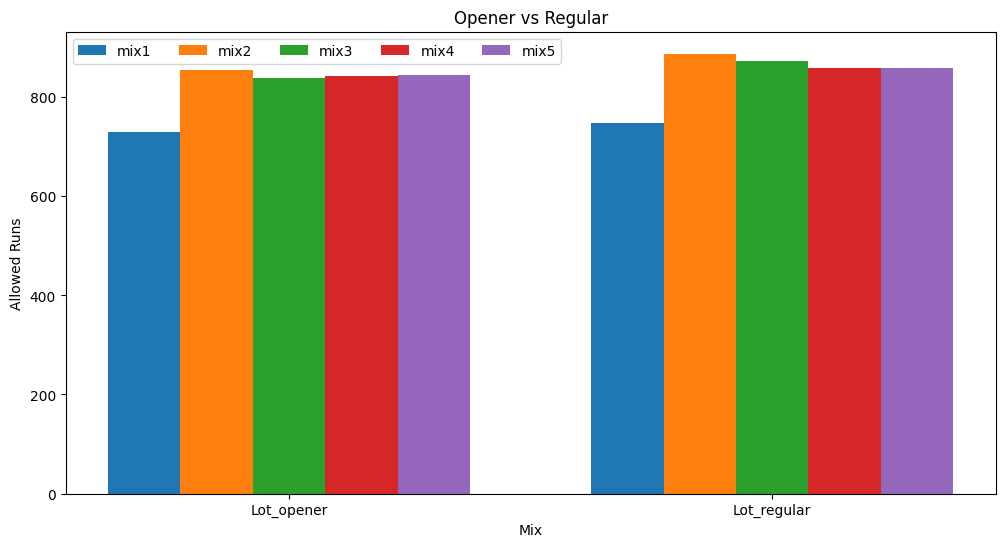

In [124]:
plt.figure(figsize = (12, 6))
plt.title('Opener vs Regular')
plt.xlabel('Mix')
plt.ylabel('Allowed Runs')
plt.bar(idx - 2 * w, lot['mix1'], width = w, label = 'mix1')
plt.bar(idx - w, lot['mix2'], width = w, label = 'mix2')
plt.bar(idx, lot['mix3'], width = w, label = 'mix3')
plt.bar(idx + w, lot['mix4'], width = w, label = 'mix4')
plt.bar(idx + 2 * w, lot['mix5'], width = w, label = 'mix5')
plt.xticks(idx, lot_id)
plt.legend(ncol = 5)
plt.show()

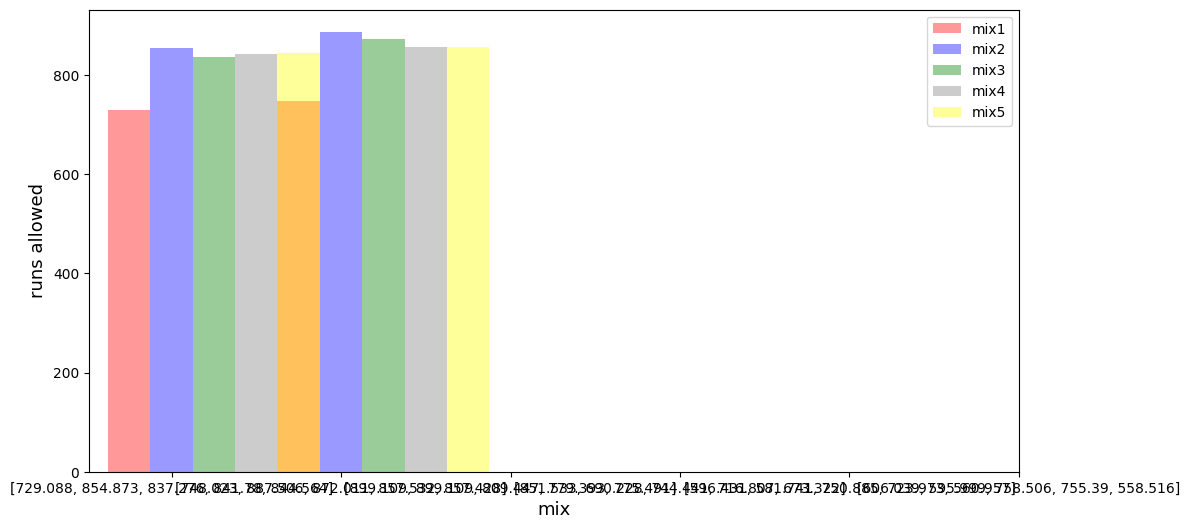

In [116]:
fig, ax = plt.subplots(figsize = (12, 6))
bar_width = 0.25

index = np.arange(2)

b1 = plt.bar(index, lot['mix1'], bar_width, alpha = 0.4, color = 'red', label = 'mix1')
b2 = plt.bar(index + 1 * bar_width, lot['mix2'], bar_width, alpha = 0.4, color = 'blue', label = 'mix2')
b3 = plt.bar(index + 2 * bar_width, lot['mix3'], bar_width, alpha = 0.4, color = 'green', label = 'mix3')
b4 = plt.bar(index + 3 * bar_width, lot['mix4'], bar_width, alpha = 0.4, color = 'gray', label = 'mix4')
b5 = plt.bar(index + 4 * bar_width, lot['mix5'], bar_width, alpha = 0.4, color = 'yellow', label = 'mix5')

plt.xticks(np.arange(bar_width, 6 + bar_width), team)

plt.xlabel('mix', size = 13)
plt.ylabel('runs allowed', size = 13)
plt.legend()
plt.show()

# Store Data

In [326]:
sample_df = pd.DataFrame({
    '롯데_오프너X' : [lot_not],
    '롯데_오프너O' : [lot_use],
    '두산_오프너X' : [doo_not],
    '두산_오프너O' : [doo_use],
    'SSG_오프너X' : [ssg_not],
    'SSG_오프너O' : [ssg_use],
    '반즈_오프너X' : [lot1_run1],
    '반즈_오프너O' : [lot1_run2],
    '박세웅_오프너X' : [lot2_run1],
    '박세웅_오프너O' : [lot2_run2],
    '이인복_오프너X' : [lot3_run1],
    '이인복_오프너O' : [lot3_run2],
    '나균안_오프너X' : [lot4_run1],
    '나균안_오프너O' : [lot4_run2],
    '스파크맨_오프너X' : [lot5_run1],
    '스파크맨_오프터O' : [lot5_run2],
    '최원준_오프너X' : [doo1_run1],
    '최원준_오프너O' : [doo1_run2],
    '스탁_오프너X' : [doo2_run1],
    '스탁_오프너O' : [doo2_run2],
    '곽빈_오프너X' : [doo3_run1],
    '곽빈_오프너O' : [doo3_run2],
    '이영하_오프너X' : [doo4_run1],
    '이영하_오프너O' : [doo4_run2],
    '최승용_오프너X' : [doo5_run1],
    '최승용_오프터O' : [doo5_run2],
    '폰트_오프너X' : [ssg1_run1],
    '폰트_오프너O' : [ssg1_run2],
    '김광현_오프너X' : [ssg2_run1],
    '김광현_오프너O' : [ssg2_run2],
    '오원석_오프너X' : [ssg3_run1],
    '오원석_오프너O' : [ssg3_run2],
    '이태양_오프너X' : [ssg4_run1],
    '이태양_오프너O' : [ssg4_run2],
    '모리만도_오프너X' : [ssg5_run1],
    '모리만도_오프터O' : [ssg5_run2],
})

print(sample_df)

    롯데_오프너X   롯데_오프너O   두산_오프너X  두산_오프너O  SSG_오프너X  SSG_오프너O  반즈_오프너X  \
0  786.3542  769.9872  723.6312   791.56  644.6324  634.3074  736.233   

   반즈_오프너O  박세웅_오프너X  박세웅_오프너O  ...  폰트_오프너X  폰트_오프너O  김광현_오프너X  김광현_오프너O  \
0  718.056   642.287   636.277  ...  596.395  589.554   585.469   574.424   

   오원석_오프너X  오원석_오프너O  이태양_오프너X  이태양_오프너O  모리만도_오프너X  모리만도_오프터O  
0   745.277   740.967   746.111    715.44     549.91    551.152  

[1 rows x 36 columns]


In [331]:
sample_df.to_csv('opener.csv', index = False, encoding='cp949')